# ACP in 3D

In [122]:
import numpy as np

from math import pi, cos, sin

### A rotation matrix in 3D

In [123]:
teta1 = pi / 3
A1 = np.array( [[cos(teta1), sin(teta1), 0],
                [-sin(teta1), cos(teta1), 0],
                [0 , 0, 1]])

In [124]:
teta2 = pi / 4
A2 = np.array( [[1, 0, 0],
                [0, cos(teta2), sin(teta2)],
                [0, -sin(teta2), cos(teta2)]])

In [125]:
rot = A1.dot(A2)

### An ellipsoid

Generating a numpy-matrix of triples of an ellipsiod

In [126]:
def random_points(sdx, sdy, sdz, n):
    X = np.random.normal(0, sdx, n)
    Y = np.random.normal(0, sdy, n)
    Z = np.random.normal(0, sdz, n)
    return np.concatenate( (X, Y, Z)).reshape(3, n)

In [127]:
np_ellipsoid = random_points(10, 5, 2, 5000)

In [128]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [129]:
def show_points(ax, np_3d):
    X, Y, Z = np_3d[0], np_3d[1], np_3d[2]
    ax.scatter(X, Y, Z)
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
    mid_x = (X.max()+X.min()) * 0.5
    mid_y = (Y.max()+Y.min()) * 0.5
    mid_z = (Z.max()+Z.min()) * 0.5
    # artificially enlarge
    max_range = max_range / 2.0
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

<IPython.core.display.Javascript object>


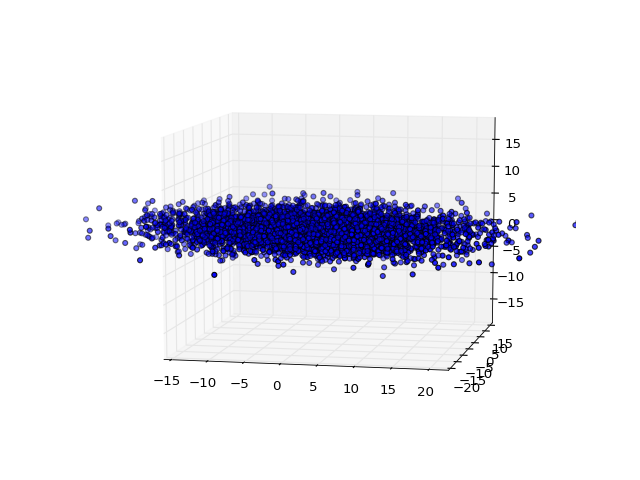

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
show_points(ax, np_ellipsoid)
plt.show()

## applying a non-isometric linear transformation

Now instead of taking this as-is, we will apply a non-isometric transformation first:

* i -> i + j
* j -> - i + j
* k -> -5i + -j + k

In [133]:
twist = np.array([1, -1, -5, 1, 1, -1, 0, 0, 1]).reshape(3, 3)

In [134]:
# checking
print(np.dot(twist, [1, 0, 0]))
print(np.dot(twist, [0, 1, 0]))
print(np.dot(twist, [0, 0, 1]))

[1 1 0]
[-1  1  0]
[-5 -1  1]


**This actually does not work too well, let's use a real rotation**

In [135]:
np_twisted = rot.dot(np_ellipsoid)

<IPython.core.display.Javascript object>


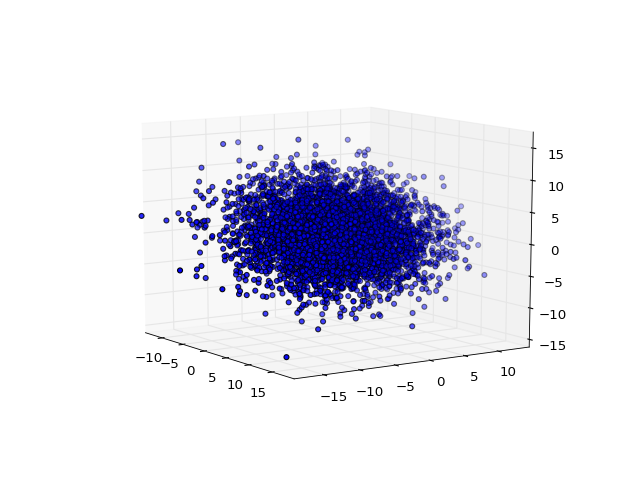

In [136]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
show_points(ax, np_twisted)
plt.show()

## Running the ACP on that

In [113]:
e = np_twisted

In [114]:
C = np.cov(e)
print(C)

[[ 35.71758851 -36.69121781  -9.5073452 ]
 [-36.69121781  78.43658162  -4.6834066 ]
 [ -9.5073452   -4.6834066   14.56255262]]


In [115]:
eigen, A = np.linalg.eig(C)
print(eigen)
print(A)

[ 99.53814018   4.0130452   25.16553737]
[[-0.49930566  0.6145807  -0.6107245 ]
 [ 0.86638792  0.3475558  -0.35857626]
 [ 0.00811321  0.70816349  0.70600187]]


In [137]:
roots = np.sqrt(eigen)
v1 = roots[0] * np.array( [1, 0, 0])
v2 = roots[1] * np.array( [0, 1, 0])
v3 = roots[1] * np.array( [0, 0, 1])
r1 = A.dot(v1)
r2 = A.dot(v2)
r3 = A.dot(v3)

<IPython.core.display.Javascript object>


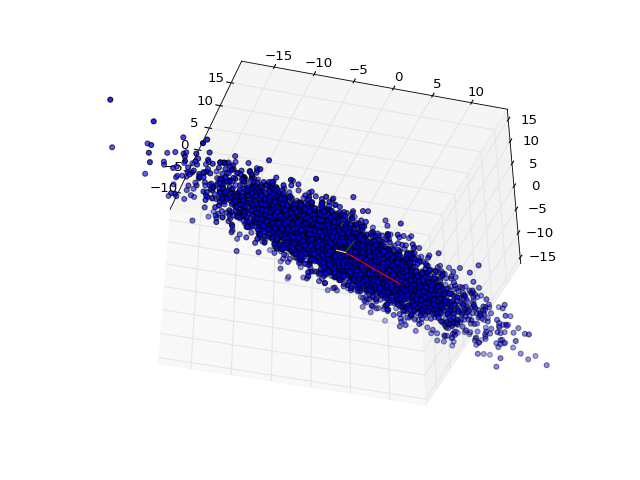

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
show_points(ax, np_twisted)
ax.plot( (0, r1[0]), (0, r1[1]), (0, r1[2]) , 'r-')
ax.plot( (0, r2[0]), (0, r2[1]), (0, r2[2]) , 'g-')
ax.plot( (0, r3[0]), (0, r3[1]), (0, r3[2]) , 'yellow')
plt.show()